# ========== JAVIER MARTÍNEZ DELGADO - PRÁCTICA 2 TIPOLOGÍA ==========

<br><br><br>
## Cargamos las librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

<br><br><br>
## Cargamos los datos y creamos un backup

In [2]:
train_backup = pd.read_csv('train.csv')
test_backup = pd.read_csv('test.csv')

train = train_backup.copy()
test = test_backup.copy()

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br><br><br>
## Comprobamos el tipo de dato que almacena cada variable

In [3]:
# Comprobamos los tipos de cada variable
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<br><br><br>
## Integración y selección de datos

In [4]:
# Guardamos los Id de los pasajeros del set de testing para hacer la entrega en kaggle al final
ids = test['PassengerId']

# Borramos la variables de Id de los pasajeros de ambos sets
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

# Borramos la variable de ticket ya que no aporta información útil
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

# Extraemos la letra de cada camarote ya que los números no nos proporcionan información útil
train['Cabin']=train.Cabin.str[0]
test['Cabin']=test.Cabin.str[0]

# Extraemos el prefijo del nombre para extraer la información útil de la variable nombre
name_status=[]
for x in train.Name.to_list():
    name_status.append(x.split(", ")[1].split('.')[0])
train['Name']=name_status

name_status=[]
for x in test.Name.to_list():
    name_status.append(x.split(", ")[1].split('.')[0])
test['Name']=name_status

# Creamos una nueva variable a partir de dos que ya tenemos que nos indique el tamaño total de la familia
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# A partir de la nueva variable, creamos otra que indique si la persona viajaba sola
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

# Comprobamos cómo se ha quedado nuestro dataset después de los cambios
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,Mr,male,22.0,1,0,7.2500,NaN,S,2,0
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,0
2,1,3,Miss,female,26.0,0,0,7.9250,NaN,S,1,1
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2,0
4,0,3,Mr,male,35.0,0,0,8.0500,NaN,S,1,1


<br><br><br>
## Realizamos un análisis de la correlación entre las variables numéricas

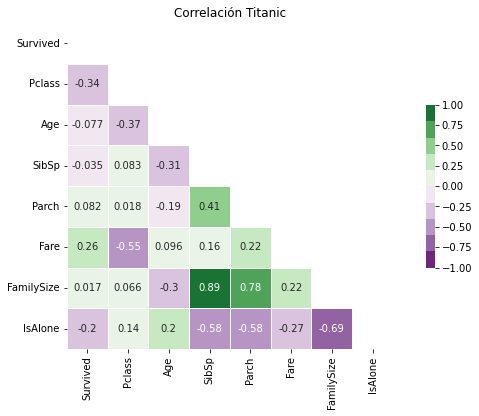

In [5]:
corr=train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12,6))
cmap = sns.color_palette("PRGn",10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.title('Correlación Titanic')
plt.show()

Podemos apreciar que las variables que están más relacionadas son FamilySize y SibSp

<br><br><br>
## Análisis de datos exploratorio

In [6]:
# En primer lugar vamos a ver qué variables contienen datos faltantes
def datosfaltantes(df):
    total=df.isna().sum().sort_values(ascending=False)
    percent=df.isna().mean().sort_values(ascending=False)*100
    final=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return final

datosfaltantes(train).head()

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000


In [7]:
datosfaltantes(test).head()

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Pclass,0,0.000000
Name,0,0.000000


<br><br><br>
### -Survived

,Total,Percent
0,549,61.616162
1,342,38.383838


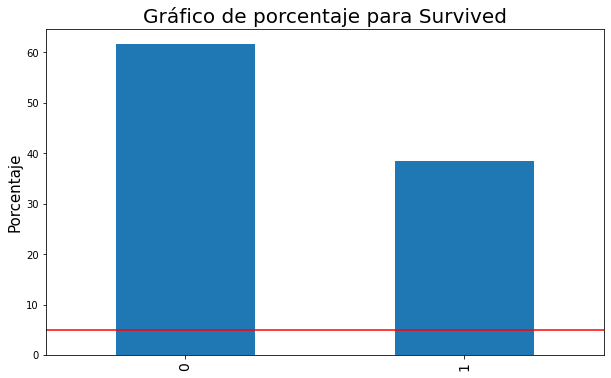

In [8]:
def cat(column):
    total=column.value_counts()
    percent=column.value_counts()/len(column)*100
    final=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    
    plt.figure(figsize=(10,6))
    fig=final.Percent.plot.bar()
    plt.title(f"Gráfico de porcentaje para {column.name}",fontsize=20)
    plt.ylabel("Porcentaje",fontsize=15)
    fig.axhline(y=5, color='red')
    plt.xticks(fontsize=14)
    
    return final

cat(train.Survived)

Podemos observar que sólo el 38.39% de los pasajeros presentes en el dataset sobrevivieron

<br><br><br>
### -Pclass

,Total,Percent
3,491,55.106622
1,216,24.242424
2,184,20.650954


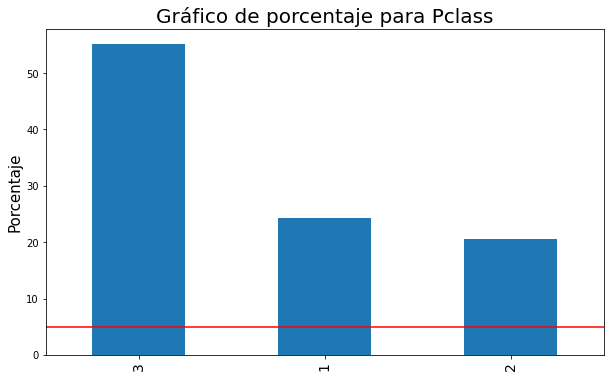

In [9]:
cat(train.Pclass)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


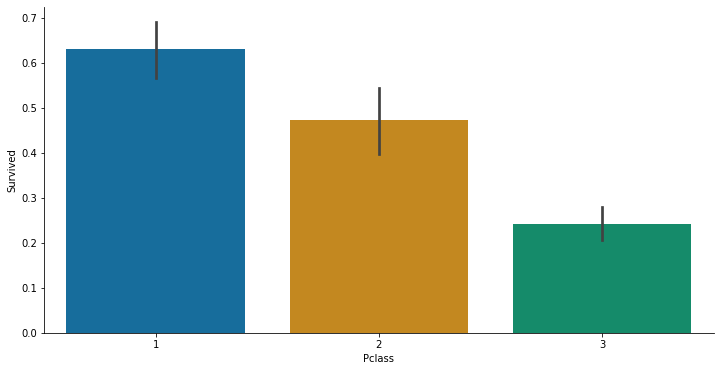

In [10]:
def supervivientes(x):
    print(train[[x,"Survived"]].groupby([x],as_index=False).mean())
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x=x,y="Survived",data=train,ax=ax,palette='colorblind')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

supervivientes("Pclass")

Podemos apreciar que la supervivencia de los pasajeros aumenta a medida que aumenta su clase social, lo que nos hace pensar que puede tener relación también con el precio del ticket y con la cubierta en la que se encontraba su camarote

<br><br><br>
### -Name

,Total,Percent
Mr,517,58.024691
Miss,182,20.426487
Mrs,125,14.029181
Master,40,4.489338
Dr,7,0.785634
Rev,6,0.673401
Mlle,2,0.224467
Major,2,0.224467
Col,2,0.224467
the Countess,1,0.112233


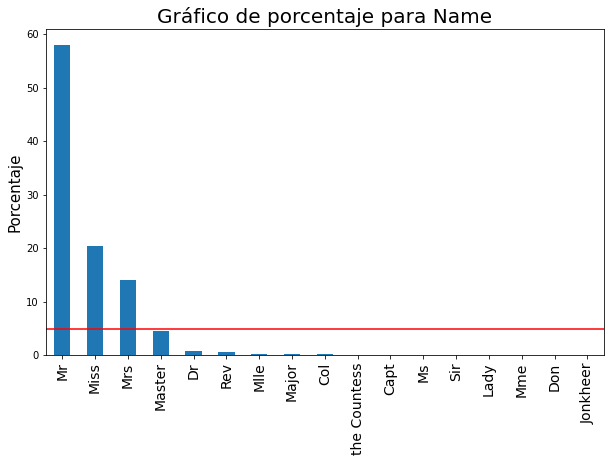

In [11]:
cat(train.Name)

En esta variable podemos ver que la cardinalidad es demasiado alta por lo que alguna de las categorías se encuentran sobrerepresentadas y otras subrepresentadas. Si lo dejamos como está y entrenamos los modelos con estos datos y en el conjunto de test no aparecen estas etiquetas, se produciría overfitting mientras que si apareciese una etiqueta en el conjunto de test pero no en el de entrenamiento, se produciría un error de producción. La mejor solución para esto, sería agrupar todas las etiquetas subrepresentadas creando una nueva

,Total,Percent
Mr,517,58.024691
Miss,182,20.426487
Mrs,125,14.029181
Rare,67,7.519641


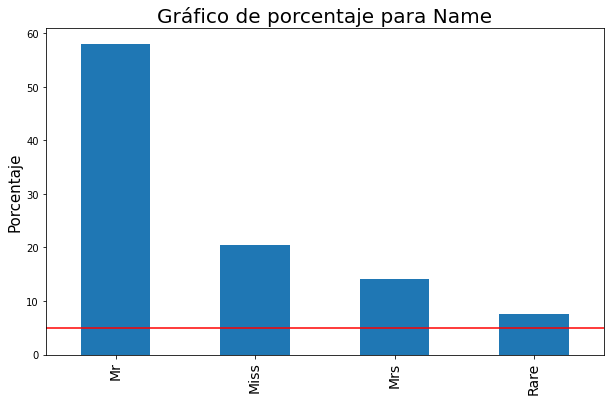

In [12]:
# Para esto, utilizaré mi propia librería, que se muestra en: https://www.kaggle.com/arcticai/arcticdata-library-1-4
import arcticdata.FeatureEngineering as fe

train.Name = fe.group_rare_labels(train.Name,train.Name)
test.Name = fe.group_rare_labels(train.Name,test.Name)

cat(train.Name)

   Name  Survived
0  Miss  0.697802
1    Mr  0.156673
2   Mrs  0.792000
3  Rare  0.522388


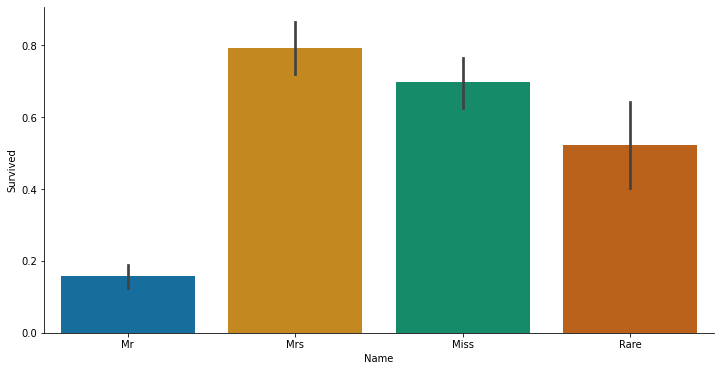

In [13]:
supervivientes('Name')

Este gráfico y tabla ya nos dejan entrever que las mujeres tuvieron una tasa de supervivencia mayor que los hombres 

<br><br><br>
### -Sex

,Total,Percent
male,577,64.758698
female,314,35.241302


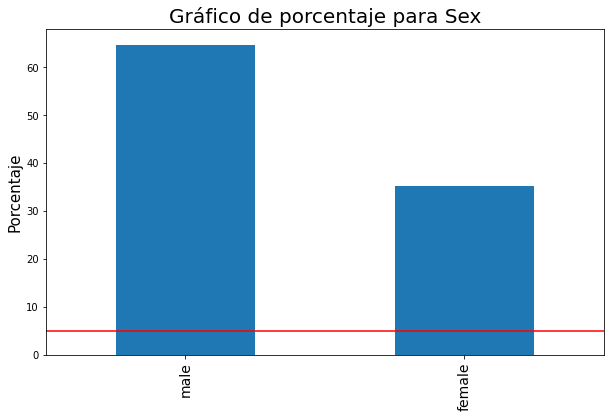

In [14]:
cat(train.Sex)

      Sex  Survived
0  female  0.742038
1    male  0.188908


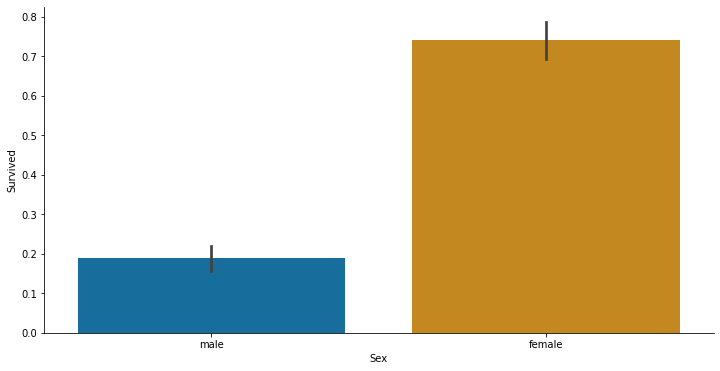

In [15]:
supervivientes('Sex')

Como hemos visto antes, había más hombres que mujeres pero la tasa de supervivencia de las mujeres era mucho mayor

<br><br><br>
### -Age

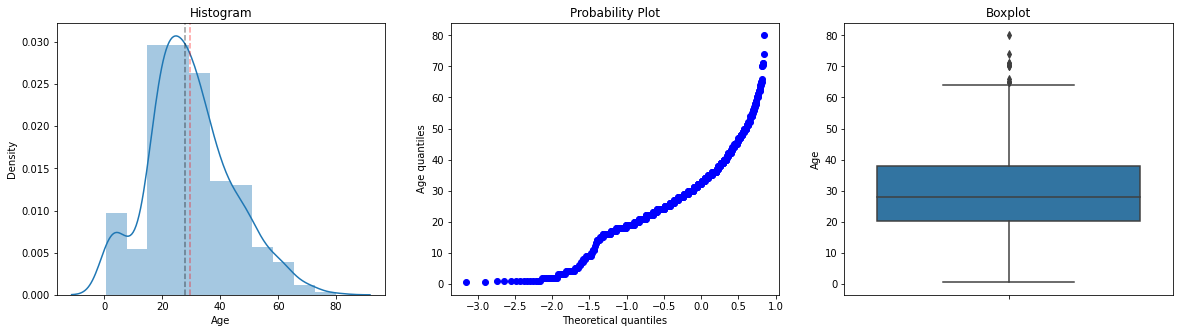

In [16]:
def distribucion(df, variable):
    def sturges(x):
        N=len(x)
        sturges=int(np.ceil(1+np.log2(N)))
        return sturges
    plt.figure(figsize=(20,5))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=sturges(df[variable]))
    mean=df[variable].mean()
    median=df[variable].median()
    plt.axvline(mean, color='r', linestyle='dashed',alpha=0.4)
    plt.axvline(median, color='k', linestyle='dashed',alpha=0.4)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('{} quantiles'.format(variable))
    plt.title('Probability Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show

distribucion(train,'Age')

Podemos ver que la distribución es bimodal, que tenemos algunos outliers que tenemos que ver si son justificados o no y parece que tenemos algún cero por lo que lo primero que vamos a hacer es un describe para ver si hay ceros y los outliers. En cuanto a la normalidad, no es normal porque es bimodal. También tenemos valores faltantes tanto en el set de entrenamiento como en el de test

In [17]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Observamos que no hay ningún cero y que el máximo es 80 por lo que no hay ningún valor que debamos cambiar. En cuanto a los valores faltantes, los imputaremos con la mediana, pero vamos a crear una nueva variable que indique cuando hay un valor faltante ya que podría ser información útil para los modelos. Vamos a hacerlo para todas las variables que presentan valores faltantes

In [18]:
test = fe.impute_missing(test,test,variables=['Age','Cabin'],method='indicator')
train = fe.impute_missing(train,train,variables=['Age','Cabin'],method='indicator')

test = fe.impute_missing(test,test,variables=['Age'],method='median')
train = fe.impute_missing(train,train,variables=['Age'],method='median')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na
0,0,3,Mr,male,22.0,1,0,7.2500,NaN,S,2,0,0,1
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,0,0,0
2,1,3,Miss,female,26.0,0,0,7.9250,NaN,S,1,1,0,1
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2,0,0,0
4,0,3,Mr,male,35.0,0,0,8.0500,NaN,S,1,1,0,1


In [19]:
# Discretizamos la variable creando intervalos de igual amplitud e igual frecuencia
test["AgeFreq"] = fe.discretization(train.drop('Survived',axis=1),test,variables=['Age'])['Age']
train["AgeFreq"] = fe.discretization(train,train,variables=['Age'])['Age']

test["AgeRange"] = fe.discretization(train.drop('Survived',axis=1),test,variables=['Age'],method="equalrange")['Age']
train["AgeRange"] = fe.discretization(train,train,variables=['Age'],method="equalrange")['Age']

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,AgeRange
0,0,3,Mr,male,22.0,1,0,7.2500,NaN,S,2,0,0,1,2,2
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,0,0,0,5,4
2,1,3,Miss,female,26.0,0,0,7.9250,NaN,S,1,1,0,1,3,3
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2,0,0,0,5,4
4,0,3,Mr,male,35.0,0,0,8.0500,NaN,S,1,1,0,1,5,4


<br><br><br>
### -SibSp

,Total,Percent
0,608,68.237935
1,209,23.456790
2,28,3.142536
4,18,2.020202
3,16,1.795735
8,7,0.785634
5,5,0.561167


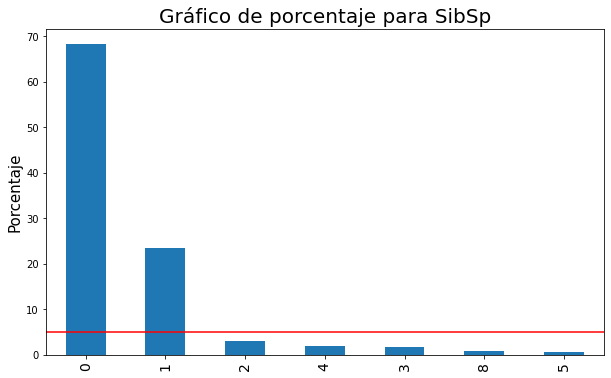

In [20]:
cat(train.SibSp)

Agrupamos otra vez las etiquetas subrepresentadas

,Total,Percent
0,608,68.237935
1,209,23.456790
Rare,74,8.305275


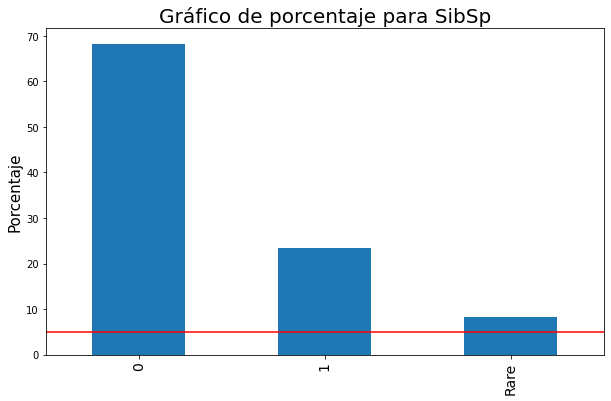

In [21]:
train.SibSp = fe.group_rare_labels(train.SibSp.astype(str),train.SibSp.astype(str))
test.SibSp = fe.group_rare_labels(train.SibSp.astype(str),test.SibSp.astype(str))

cat(train.SibSp)

  SibSp  Survived
0     0  0.345395
1     1  0.535885
2  Rare  0.270270


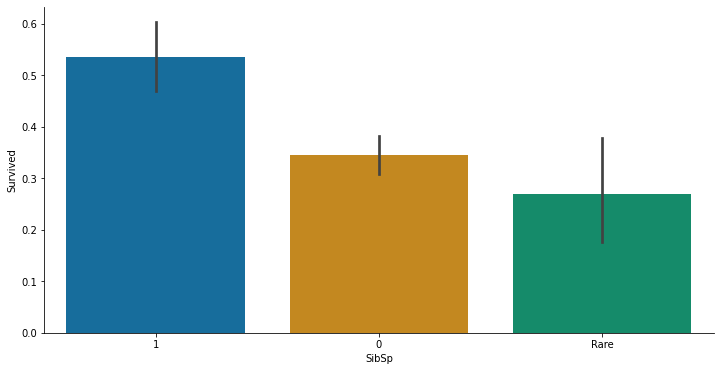

In [22]:
supervivientes('SibSp')

Podemos ver que los pasajeros que tenían un hermano/a o que iban con su pareja, tenían una mayor probabilidad de supervivencia, mientras que si no tenían o si tenían más que uno, disminuía

<br><br><br>
### -parch

,Total,Percent
0,678,76.094276
1,118,13.243547
2,80,8.978676
5,5,0.561167
3,5,0.561167
4,4,0.448934
6,1,0.112233


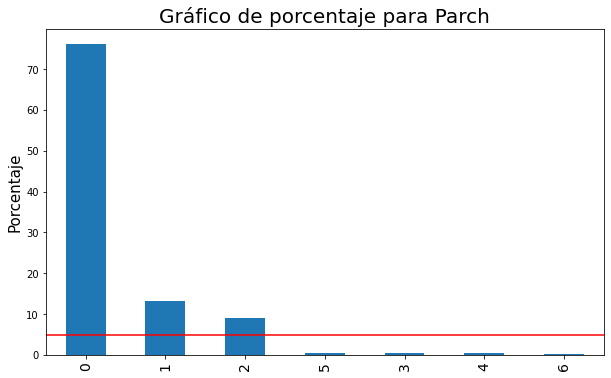

In [23]:
cat(train.Parch)

,Total,Percent
0,678,76.094276
1,118,13.243547
2,80,8.978676
Rare,15,1.683502


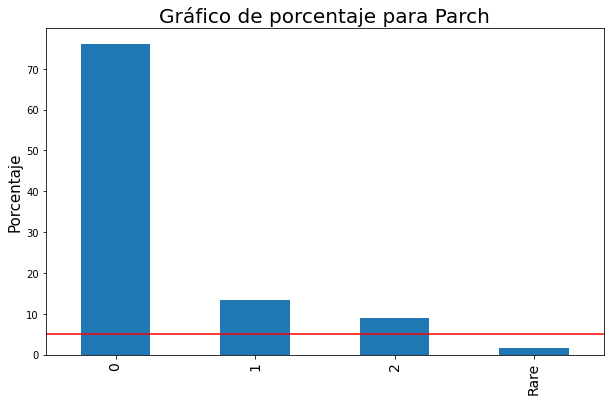

In [24]:
train.Parch = fe.group_rare_labels(train.Parch.astype(str),train.Parch.astype(str))
test.Parch = fe.group_rare_labels(train.Parch.astype(str),test.Parch.astype(str))

cat(train.Parch)

  Parch  Survived
0     0  0.343658
1     1  0.550847
2     2  0.500000
3  Rare  0.266667


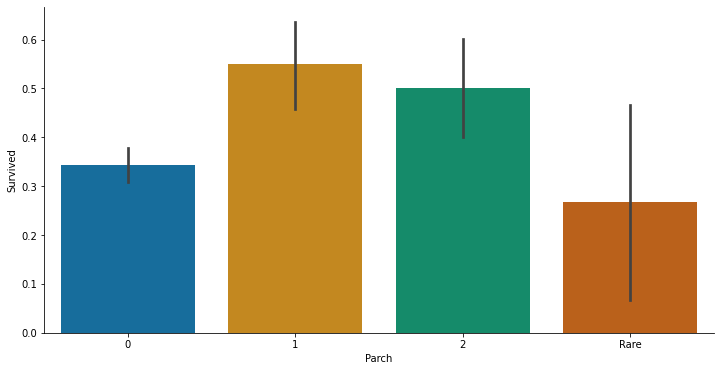

In [25]:
supervivientes('Parch')

Podemos ver que la tasa de supervivencia era mayor si tenías uno o dos hijos o padres a bordo

<br><br><br>
### -Fare

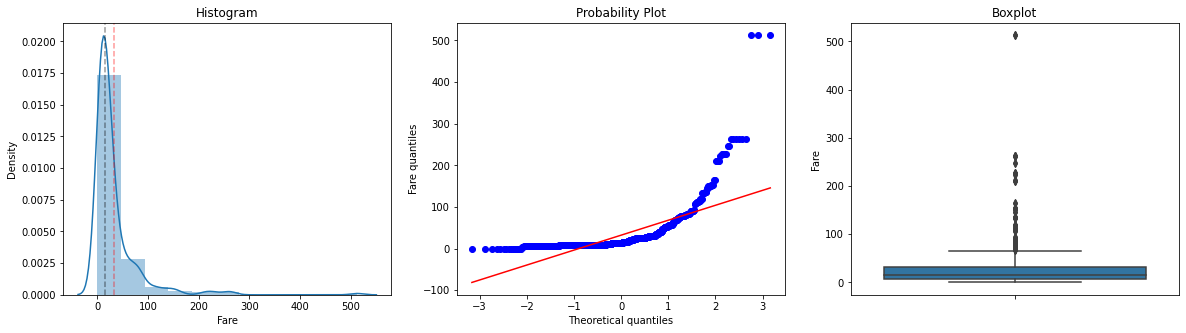

In [26]:
distribucion(train,'Fare')

Como podemos apreciar, la distribución es asimétrica por lo que obtenemos muchos outliers, pero hay unos que están muy alejados del resto. Vamos a analizar eso

In [27]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
# Voy a utilizar una función de mi librería que me devuelve un dataframe con los outliers y le especificaré que lo haga con los mayores a 3*IQR 
train.loc[train.Fare>300,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,AgeRange
258,1,1,Miss,female,35.0,0,0,512.3292,NaN,C,1,1,0,1,5,4
679,1,1,Mr,male,36.0,0,1,512.3292,B,C,2,0,0,0,5,4
737,1,1,Mr,male,35.0,0,0,512.3292,B,C,1,1,0,0,5,4


Al estudiarlo, observamos que esos tres outliers que tenemos embarcaron en la misma ciudad, pagaron lo mismo por su billete y sobrevivieron por lo que podemos deducir que no son datos erróneos y que sólo eran personas de clase muy alta que estaban en la mejor zona del barco

In [29]:
test = fe.impute_missing(test,test,variables=['Fare'],method='median')
train = fe.impute_missing(train,train,variables=['Fare'],method='median')

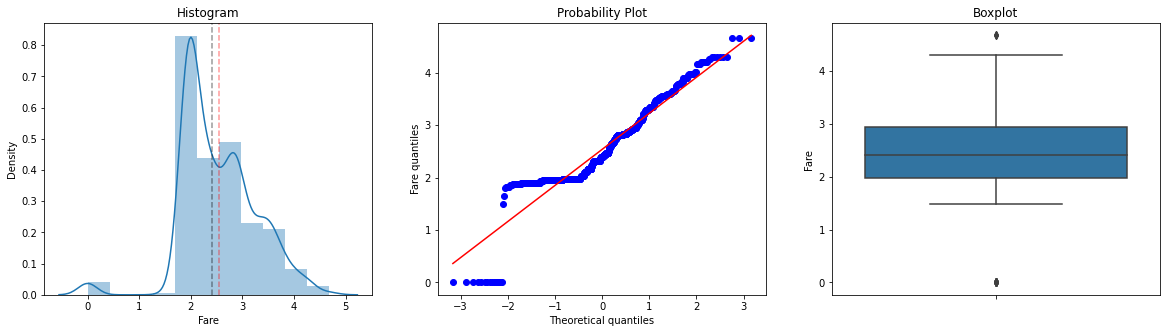

In [30]:
# Llevamos a cabo la transformación de Yeo-Johnson con el fin de que nuestro modelo interprete bien la variable con menos outliers
train = fe.transform(train,variables='Fare',method='yeo')
test = fe.transform(test,variables='Fare',method='yeo')

distribucion(train,'Fare')

In [31]:
# Discretizamos la variable creando intervalos de igual amplitud e igual frecuencia
test["FareFreq"] = fe.discretization(train.drop('Survived',axis=1),test,variables=['Fare'])['Fare']
train["FareFreq"] = fe.discretization(train,train,variables=['Fare'])['Fare']

test["FareRange"] = fe.discretization(train.drop('Survived',axis=1),test,variables=['Fare'],method="equalrange")['Fare']
train["FareRange"] = fe.discretization(train,train,variables=['Fare'],method="equalrange")['Fare']

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,AgeRange,FareFreq,FareRange
0,0,3,Mr,male,22.0,1,0,1.906724,NaN,S,2,0,0,1,2,2,0,4
1,1,1,Mrs,female,38.0,1,0,3.497640,C,C,2,0,0,0,5,4,8,7
2,1,3,Miss,female,26.0,0,0,1.970459,NaN,S,1,1,0,1,3,3,2,4
3,1,1,Mrs,female,35.0,1,0,3.304258,C,S,2,0,0,0,5,4,8,7
4,0,3,Mr,male,35.0,0,0,1.981680,NaN,S,1,1,0,1,5,4,2,4


<br><br><br>
### -Cabin

,Total,Percent
C,59,6.621773
B,47,5.274972
D,33,3.703704
E,32,3.591470
A,15,1.683502
F,13,1.459035
G,4,0.448934
T,1,0.112233


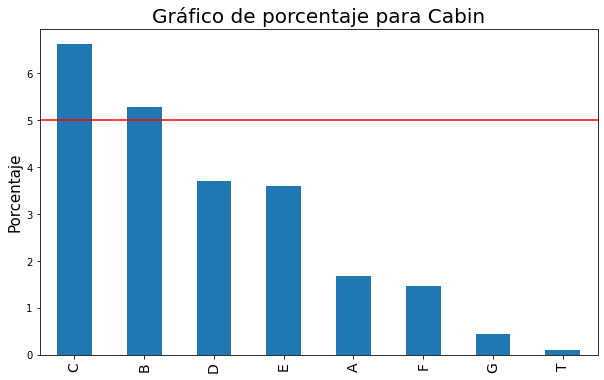

In [32]:
cat(train.Cabin)

Al tener tantos valores faltantes y ser categórica, crearemos una nueva etiqueta para los valores faltantes

In [33]:
test = fe.impute_missing(test,test,variables=['Cabin'],method='category')
train = fe.impute_missing(train,train,variables=['Cabin'],method='category')

,Total,Percent
Missing,687,77.104377
Rare,98,10.998878
C,59,6.621773
B,47,5.274972


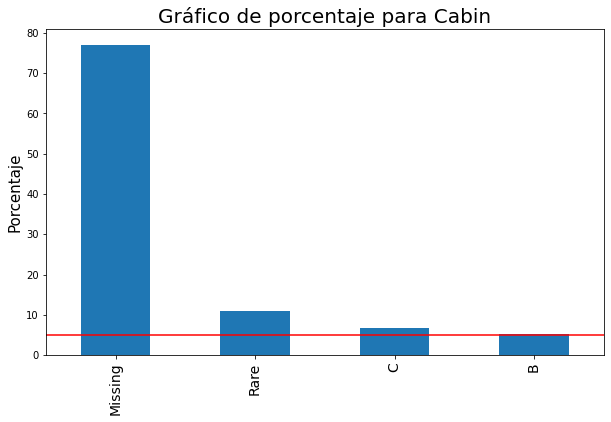

In [34]:
train.Cabin = fe.group_rare_labels(train.Cabin.astype(str),train.Cabin.astype(str))
test.Cabin = fe.group_rare_labels(train.Cabin.astype(str),test.Cabin.astype(str))

cat(train.Cabin)

     Cabin  Survived
0        B  0.744681
1        C  0.593220
2  Missing  0.299854
3     Rare  0.673469


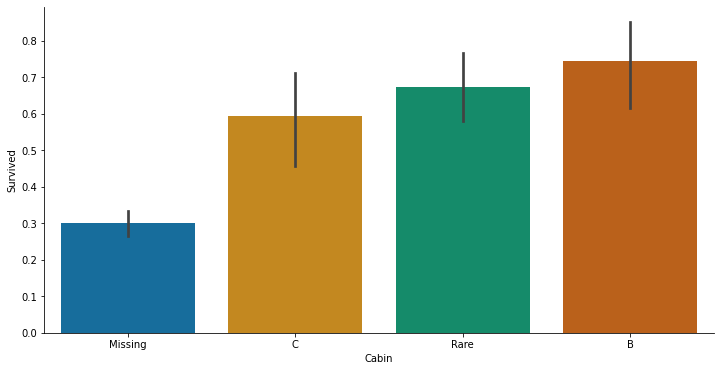

In [35]:
supervivientes('Cabin')

Podemos ver que la cubierta en la que sobrevivió más gente fue la B, luego las demás y por último la C. Como hemos visto, la C era de clase alta por lo que tiene sentido que hubiese mucha menos gente

<br><br><br>
### -Embarked

,Total,Percent
S,644,72.278339
C,168,18.855219
Q,77,8.641975


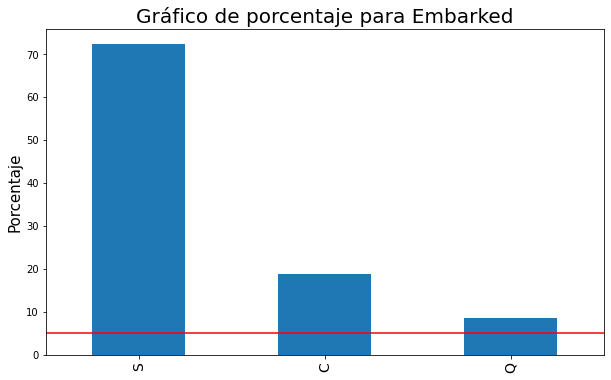

In [36]:
cat(train.Embarked)

In [37]:
train.loc[(train.Embarked!='S')&(train.Embarked!='C')&(train.Embarked!='Q'),]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,AgeRange,FareFreq,FareRange
61,1,1,Miss,female,38.0,0,0,3.572139,B,NaN,1,1,0,0,5,4,9,7
829,1,1,Mrs,female,62.0,0,0,3.572139,B,NaN,1,1,0,0,7,7,9,7


In [38]:
train.loc[(train.Pclass==1)&(train.Sex=='female')&(train.Cabin=='B')&(train.FamilySize==1),]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,AgeRange,FareFreq,FareRange
61,1,1,Miss,female,38.0,0,0,3.572139,B,NaN,1,1,0,0,5,4,9,7
194,1,1,Mrs,female,44.0,0,0,2.862097,B,C,1,1,0,0,6,5,7,6
195,1,1,Miss,female,58.0,0,0,3.951026,B,C,1,1,0,0,7,7,9,8
257,1,1,Miss,female,30.0,0,0,3.622176,B,S,1,1,0,0,4,3,9,7
369,1,1,Rare,female,24.0,0,0,3.479309,B,C,1,1,0,0,2,2,8,7
504,1,1,Miss,female,16.0,0,0,3.622176,B,S,1,1,0,0,0,1,9,7
520,1,1,Miss,female,30.0,0,0,3.671691,B,S,1,1,0,0,4,3,9,7
641,1,1,Rare,female,24.0,0,0,3.479309,B,C,1,1,0,0,2,2,8,7
730,1,1,Miss,female,29.0,0,0,4.170586,B,S,1,1,0,0,4,3,9,8
759,1,1,Rare,female,33.0,0,0,3.622176,B,S,1,1,0,0,5,4,9,7


In [39]:
# Supondremos que han embarcado desde Southampton ya que tienen mayor similitud con otros pasajeros de esa ciudad
train.loc[(train.Embarked!='S')&(train.Embarked!='C')&(train.Embarked!='Q'),'Embarked'] = 'S'

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


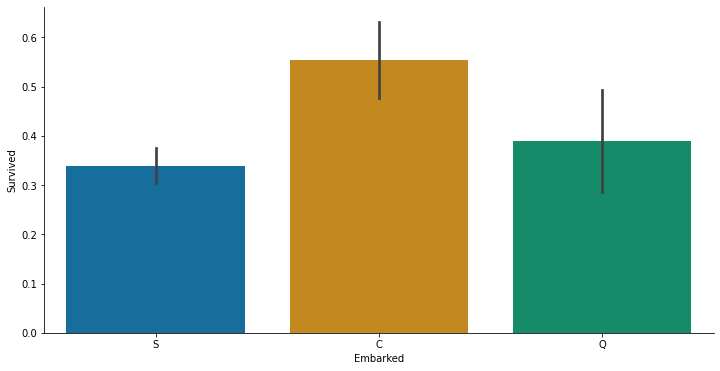

In [40]:
supervivientes('Embarked')

Podemos ver que los pasajeros que embarcaron en Cherbourg sobrevivieron más que los que embarcaron en Queenstown o en Southampton

In [41]:
test = fe.impute_missing(test,test,variables=['Embarked'],method='category')
train = fe.impute_missing(train,train,variables=['Embarked'],method='category')

<br><br><br>
### -FamilySize

,Total,Percent
1,537,60.269360
2,161,18.069585
3,102,11.447811
4,29,3.254770
6,22,2.469136
5,15,1.683502
7,12,1.346801
11,7,0.785634
8,6,0.673401


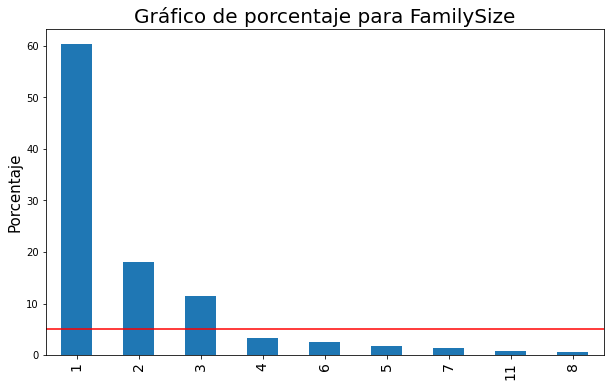

In [42]:
cat(train.FamilySize)

,Total,Percent
1,537,60.269360
2,161,18.069585
3,102,11.447811
Rare,91,10.213244


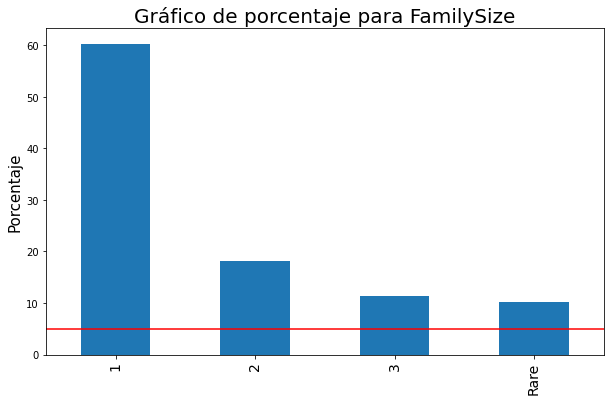

In [43]:
train.FamilySize = fe.group_rare_labels(train.FamilySize.astype(str),train.FamilySize.astype(str))
test.FamilySize = fe.group_rare_labels(train.FamilySize.astype(str),test.FamilySize.astype(str))

cat(train.FamilySize)

  FamilySize  Survived
0          1  0.303538
1          2  0.552795
2          3  0.578431
3       Rare  0.340659


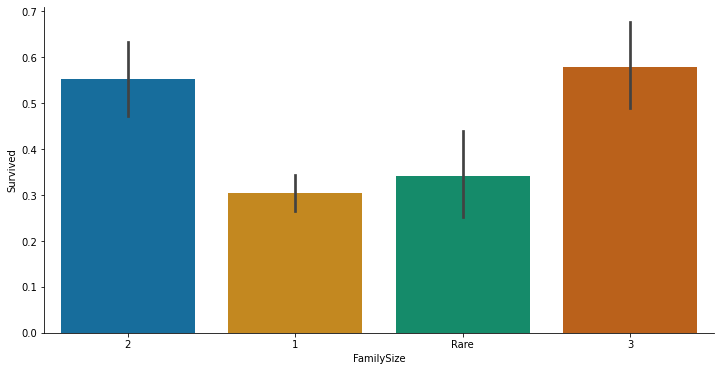

In [44]:
supervivientes('FamilySize')

Como habíamos visto antes, las familias compuestas por 2 o 3 personas tuvieron una tasa de supervivencia superior a las personas que viajaban sin familia o cuya familia estaba compuesta por más de 3 personas

<br><br><br>
### -IsAlone

,Total,Percent
1,537,60.26936
0,354,39.73064


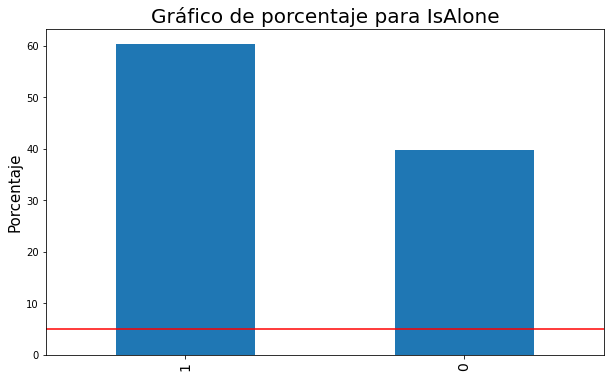

In [45]:
cat(train.IsAlone)

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


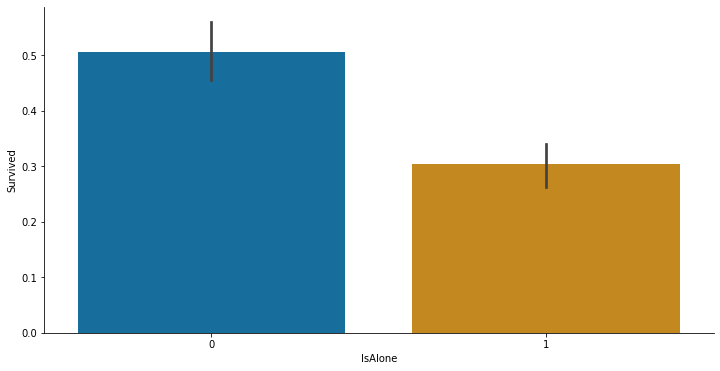

In [46]:
supervivientes('IsAlone')

<br><br><br>
### -Test de normalidad

In [47]:
# Pruebas de normalidad
from statsmodels.stats.diagnostic import lilliefors
print('Test de normalidad sobre la variable Age')
print(lilliefors(train.Age, dist='norm', pvalmethod='approx'))

print('\nTest de normalidad sobre la variable Fare')
print(lilliefors(train.Fare, dist='norm', pvalmethod='approx'))

Test de normalidad sobre la variable Age
(0.1465831994748112, 1.9137846421459075e-52)

Test de normalidad sobre la variable Fare
(0.15084676459226862, 1.1501285849049171e-55)


In [48]:
train = fe.encoding(train,train,method='order',variables=['FamilySize','SibSp','Parch'])
test = fe.encoding(test,test,method='order',variables=['FamilySize','SibSp','Parch'])

In [49]:
train = fe.encoding(train,train,method='onehot',drop_last=False)
test = fe.encoding(test,test,method='onehot',drop_last=False)

In [50]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_na,Cabin_na,...,Name_Rare,Sex_male,Sex_female,Cabin_Missing,Cabin_C,Cabin_Rare,Cabin_B,Embarked_S,Embarked_C,Embarked_Q
0,0,3,22.0,0,0,1.906724,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38.0,0,0,3.497640,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1,3,26.0,1,0,1.970459,1,1,0,1,...,0,0,1,1,0,0,0,1,0,0
3,1,1,35.0,0,0,3.304258,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,3,35.0,1,0,1.981680,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0


In [51]:
# Como vemos, cada variable tiene su escala por lo que vamos a normalizar las variables para prepararlas para los modelos. Se hará por el método de min-max
target = train.Survived
train_scaled = fe.scale(train.drop('Survived',axis=1))
test_scaled = fe.scale(test)

train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_na,Cabin_na,AgeFreq,...,Name_Rare,Sex_male,Sex_female,Cabin_Missing,Cabin_C,Cabin_Rare,Cabin_B,Embarked_S,Embarked_C,Embarked_Q
0,1.0,0.271174,0.0,0.0,0.408170,0.000000,0.0,0.0,1.0,0.285714,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.472229,0.0,0.0,0.748736,0.000000,0.0,0.0,0.0,0.714286,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.321438,0.5,0.0,0.421814,0.333333,1.0,0.0,1.0,0.428571,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.434531,0.0,0.0,0.707339,0.000000,0.0,0.0,0.0,0.714286,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.434531,0.5,0.0,0.424216,0.333333,1.0,0.0,1.0,0.714286,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br><br>
### -Test de heterocedasticidad

In [52]:
from scipy.stats import fligner
print('Test Fligner-Killeen para ver al heterocedasticidad entre Age y Fare sin escalar')
print(fligner(train.Age,train.Fare))

print('\nTest Fligner-Killeen para ver al heterocedasticidad entre Age y Fare escaladas')
print(fligner(train_scaled.Age,train_scaled.Fare))

Test Fligner-Killeen para ver al heterocedasticidad entre Age y Fare sin escalar
FlignerResult(statistic=468.4919188107899, pvalue=6.822433666142603e-104)

Test Fligner-Killeen para ver al heterocedasticidad entre Age y Fare escaladas
FlignerResult(statistic=5.12171310576356, pvalue=0.02362827975966445)


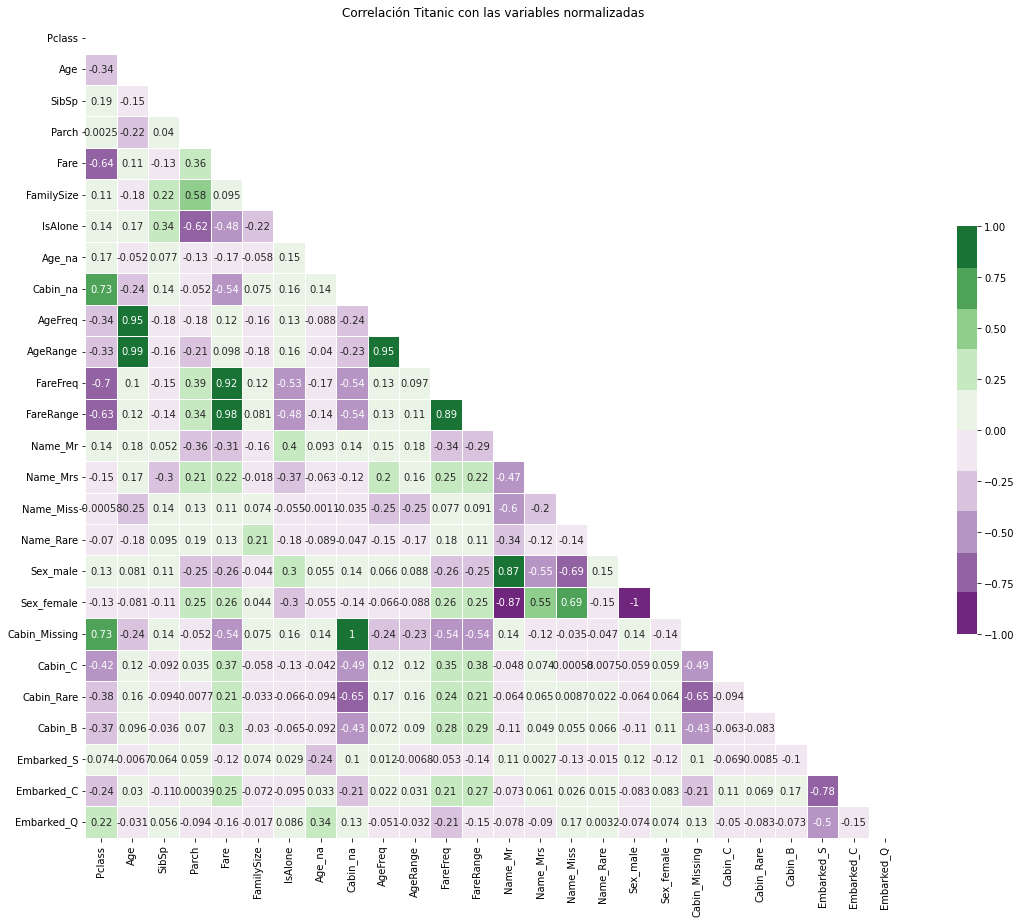

In [53]:
corr=train_scaled.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,15))
cmap = sns.color_palette("PRGn",10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.title('Correlación Titanic con las variables normalizadas')
plt.show()

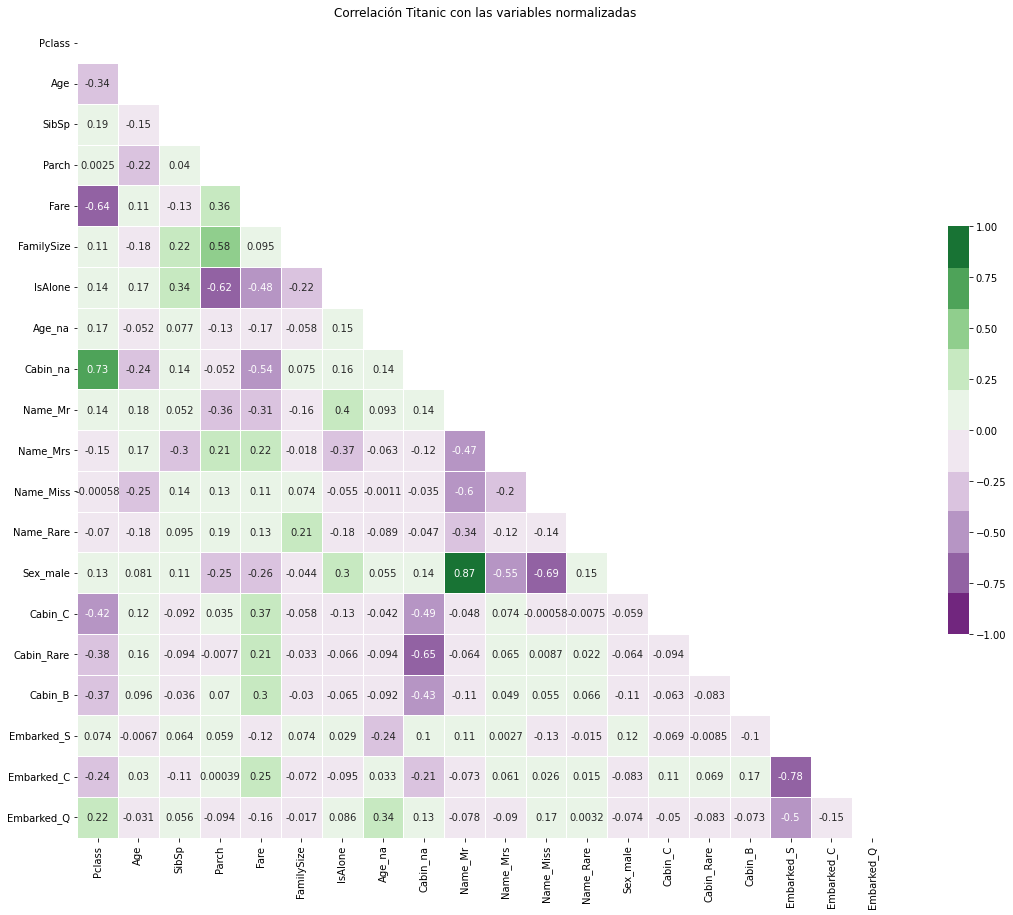

In [54]:
import arcticdata.FeatureSelection as fs

# Como vemos, hemos obtenido algunas variables muy correlacionadas entre ellas por lo que vamos a eliminarlas
train_scaled = fs.dropcorrelated(train_scaled,threshold=0.9)
test_scaled = fs.dropcorrelated(test_scaled,threshold=0.9)

corr=train_scaled.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,15))
cmap = sns.color_palette("PRGn",10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.title('Correlación Titanic con las variables normalizadas')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled,target, test_size=0.2, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}\n')

X_train: (712, 20)
X_test: (179, 20)
y_train: (712,)
y_test: (179,)



Score training: 0.9887640449438202
Score test: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



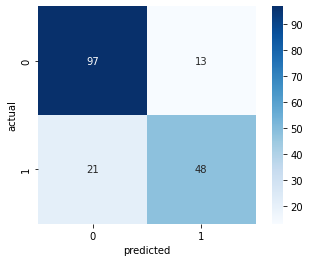

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

random_forest = RandomForestClassifier(random_state=0)
rfitted = random_forest.fit(X_train, y_train)

print(f'Score training: {rfitted.score(X_train,y_train)}')
print(f'Score test: {rfitted.score(X_test,y_test)}')

predicted=random_forest.predict(X_test)

print(classification_report(y_test,predicted))
matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [57]:
# Llevamos a cabo una selección de atributos mediante el algoritmo de step forward
model=RandomForestClassifier(random_state=0)
fs.step_forward(X_train,y_train,model=model,kfeatures=20,info=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.2s finished

[2021-12-28 20:28:24] Features: 1/20 -- score: 0.7841766843723791[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.0s finished

[2021-12-28 20:28:28] Features: 2/20 -- score: 0.8419510862200267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.8s finished

[2021-12-28 20:28:32] Features: 3/20 -- score: 0.8561303341146785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [58]:
fs.step_forward(X_train,y_train,model=model,kfeatures=8,info=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.7s finished

[2021-12-28 20:29:14] Features: 1/8 -- score: 0.7841766843723791[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.3s finished

[2021-12-28 20:29:19] Features: 2/8 -- score: 0.8419510862200267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.2s finished

[2021-12-28 20:29:23] Features: 3/8 -- score: 0.8561303341146785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

['Pclass',
 'SibSp',
 'IsAlone',
 'Age_na',
 'Name_Mr',
 'Name_Rare',
 'Sex_male',
 'Embarked_Q']

In [59]:
X_train = X_train[['Pclass','SibSp','IsAlone','Age_na','Name_Mr','Name_Rare','Sex_male','Embarked_Q']]
X_test = X_test[['Pclass','SibSp','IsAlone','Age_na','Name_Mr','Name_Rare','Sex_male','Embarked_Q']]
test = test[['Pclass','SibSp','IsAlone','Age_na','Name_Mr','Name_Rare','Sex_male','Embarked_Q']]

In [60]:
from sklearn.model_selection import RandomizedSearchCV
params =  {'n_estimators': [100,500,1000,1500,2000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,6,8,10,12,14,16,18,20],
                                  'min_samples_split': [2,5,10,15,20,25,30,35]}

clf = RandomizedSearchCV(random_forest, params, cv=10, return_train_score=True)
best_clf = clf.fit(X_train,y_train)
best_clf

means=clf.cv_results_["mean_test_score"]
stds=clf.cv_results_["std_test_score"]
params=clf.cv_results_["params"]

for m,s,p in zip(means,stds,params):
    print("%0.3f (+/-%0.3f) for %r"%(m,2*s,p))
    
print("="*100)
print("="*100)

print('best score: {:0.3f}'.format(clf.score(X_train, y_train)))
print('best params: {}'.format(clf.best_params_))
print('best val score:  {:0.3f}'.format(clf.best_score_))

0.817 (+/-0.057) for {'n_estimators': 1000, 'min_samples_split': 35, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
0.826 (+/-0.067) for {'n_estimators': 1500, 'min_samples_split': 35, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
0.802 (+/-0.084) for {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.813 (+/-0.070) for {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
0.812 (+/-0.058) for {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
0.811 (+/-0.078) for {'n_estimators': 2000, 'min_samples_split': 15, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.803 (+/-0.089) for {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_lea

In [61]:
best_model=RandomForestClassifier(n_estimators=1500,bootstrap=True,max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=25)
best_model.fit(X_train,y_train)
preds=best_model.predict(test)

In [62]:
print('Importancia de las variables en nuestro modelo final:')
pd.DataFrame({'Variable':X_train.columns,'Importancia':best_model.feature_importances_}).sort_values('Importancia',ascending=False)

Importancia de las variables en nuestro modelo final:


,Variable,Importancia
4,Name_Mr,0.349456
6,Sex_male,0.299996
0,Pclass,0.194759
1,SibSp,0.056923
2,IsAlone,0.028456
5,Name_Rare,0.027010
3,Age_na,0.023696
7,Embarked_Q,0.019703


Como podemos observar, lo que más importancia tiene es el sexo del pasajero y la clase social

In [63]:
output = pd.DataFrame({ "PassengerId" : ids, "Survived": preds })
output.to_csv("submission.csv", index=False)

In [64]:
train_scaled.to_csv('trainfinal.csv',index=False)
test_scaled.to_csv('testfinal.csv',index=False)